<a href="https://colab.research.google.com/github/pullz6/RUL_Prediction/blob/main/NASA_Engine_RUL_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from google.colab import drive
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

drive.mount('/content/drive')
df_engine_test1 = pd.read_csv('/content/drive/My Drive/sample_data/Projects/NASA-Engine-Safety/test_FD001.txt', sep = "\s+", header = None)
df_engine_test2 = pd.read_csv('/content/drive/My Drive/sample_data/Projects/NASA-Engine-Safety/test_FD002.txt', sep = "\s+", header = None)
df_engine_test3 = pd.read_csv('/content/drive/My Drive/sample_data/Projects/NASA-Engine-Safety/test_FD003.txt', sep = "\s+", header = None)
df_engine_test4 = pd.read_csv('/content/drive/My Drive/sample_data/Projects/NASA-Engine-Safety/test_FD004.txt', sep = "\s+", header = None)

df_engine_train1 = pd.read_csv('/content/drive/My Drive/sample_data/Projects/NASA-Engine-Safety/train_FD001.txt', sep = "\s+", header = None)
df_engine_train2 = pd.read_csv('/content/drive/My Drive/sample_data/Projects/NASA-Engine-Safety/train_FD002.txt', sep = "\s+", header = None)
df_engine_train3 = pd.read_csv('/content/drive/My Drive/sample_data/Projects/NASA-Engine-Safety/train_FD003.txt', sep = "\s+", header = None)
df_engine_train4 = pd.read_csv('/content/drive/My Drive/sample_data/Projects/NASA-Engine-Safety/train_FD004.txt', sep = "\s+", header = None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
frames = [df_engine_test1,df_engine_test2,df_engine_test3,df_engine_test4]
frames_train = [df_engine_train1,df_engine_train2,df_engine_train3,df_engine_train4]
df_engine_test = pd.concat(frames,ignore_index=True)
df_engine_train = pd.concat(frames_train,ignore_index=True)

In [71]:
df_engine_test.columns = ['Unit Number', 'Time (Cycles)','operational setting 1','operational setting 2','operational setting 3','sensor measurement 1','sensor measurement 2','sensor measurement 3','sensor measurement 4','sensor measurement 5','sensor measurement 6','sensor measurement 7','sensor measurement 8','sensor measurement 9','sensor measurement 10','sensor measurement 11','sensor measurement 12','sensor measurement 13','sensor measurement 14','sensor measurement 15','sensor measurement 16','sensor measurement 17','sensor measurement 18','sensor measurement 19','sensor measurement 20','sensor measurement 21']

In [72]:
df_engine_train.columns = ['Unit Number', 'Time (Cycles)','operational setting 1','operational setting 2','operational setting 3','sensor measurement 1','sensor measurement 2','sensor measurement 3','sensor measurement 4','sensor measurement 5','sensor measurement 6','sensor measurement 7','sensor measurement 8','sensor measurement 9','sensor measurement 10','sensor measurement 11','sensor measurement 12','sensor measurement 13','sensor measurement 14','sensor measurement 15','sensor measurement 16','sensor measurement 17','sensor measurement 18','sensor measurement 19','sensor measurement 20','sensor measurement 21']

In [73]:
def add_RUL (dataset):
  max_time_cycles = dataset.groupby(by='Unit Number')['Time (Cycles)'].max()
  dataset = dataset.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='Unit Number',right_index=True)
  dataset["RUL"] = dataset["max_time_cycle"] - dataset['Time (Cycles)']
  dataset = dataset.drop("max_time_cycle", axis=1)
  return dataset

In [74]:
df_engine_test = add_RUL(df_engine_test)
df_engine_train = add_RUL(df_engine_train)

In [75]:
df_engine_train = df_engine_train.groupby('Unit Number')
df_engine_test = df_engine_test.groupby('Unit Number')

In [76]:
average_values = df_engine_train.max()
average_values_test = df_engine_test.max()

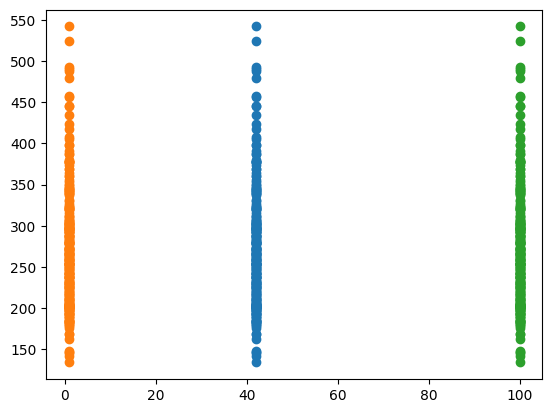

In [77]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(average_values['operational setting 1'],average_values['RUL'])
plt.scatter(average_values['operational setting 2'],average_values['RUL'])
plt.scatter(average_values['operational setting 3'],average_values['RUL'])
plt.show()

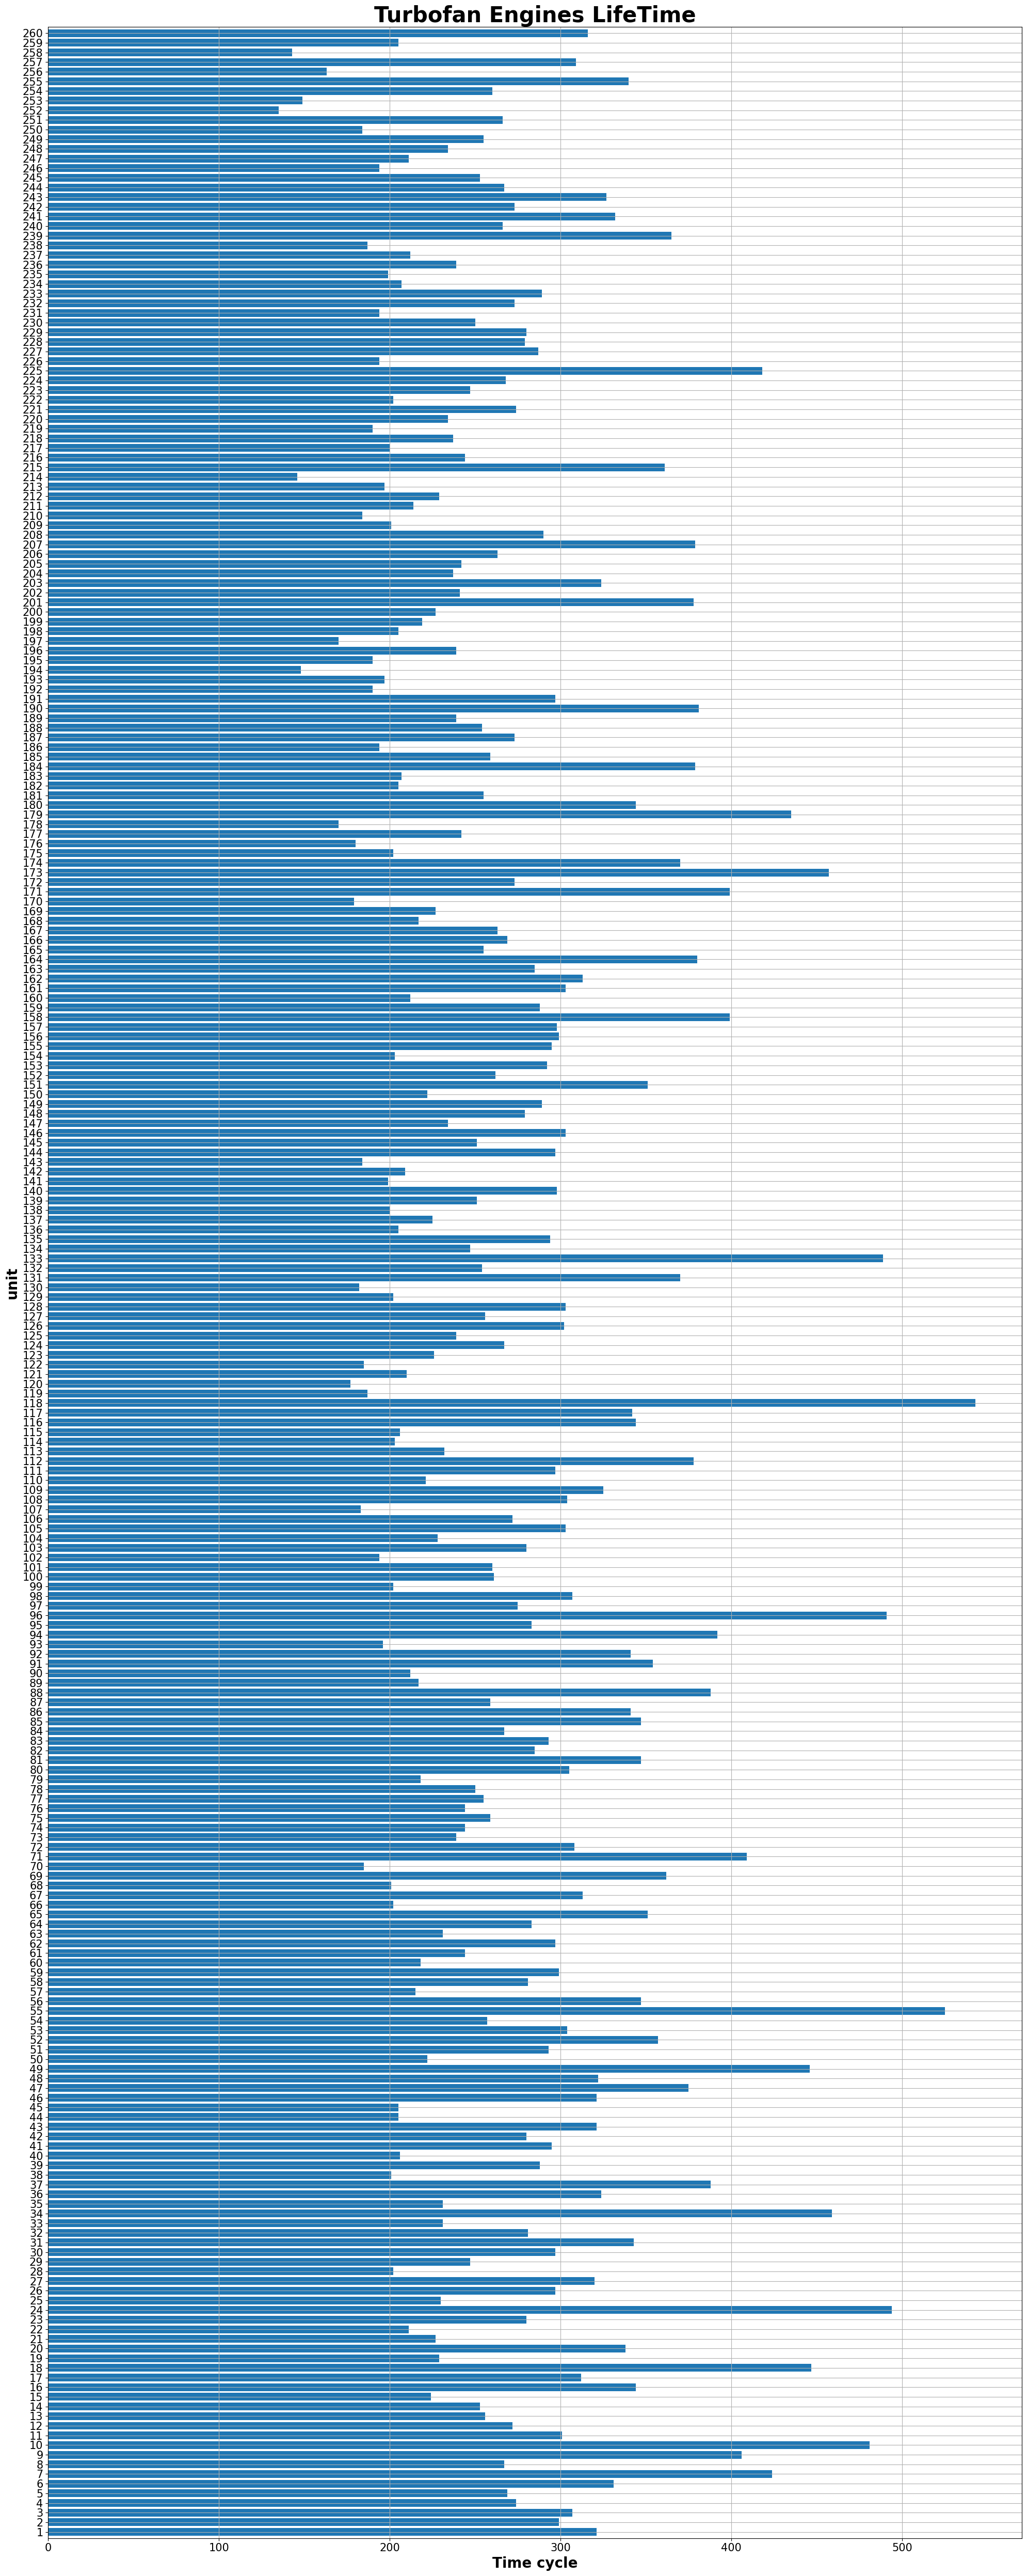

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,50))
ax=average_values['Time (Cycles)'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 9.444444444444459, 'Max Time Cycle')

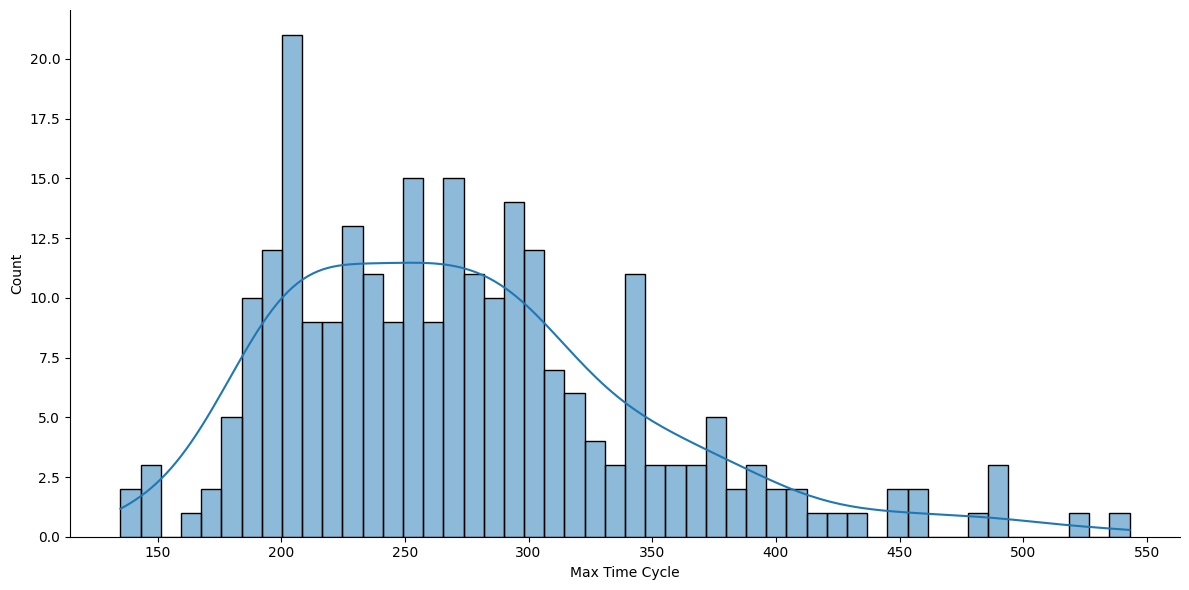

In [79]:
import seaborn as sns
sns.displot(average_values['Time (Cycles)'],kde=True,bins=50,height=6,aspect=2)
plt.xlabel('Max Time Cycle')

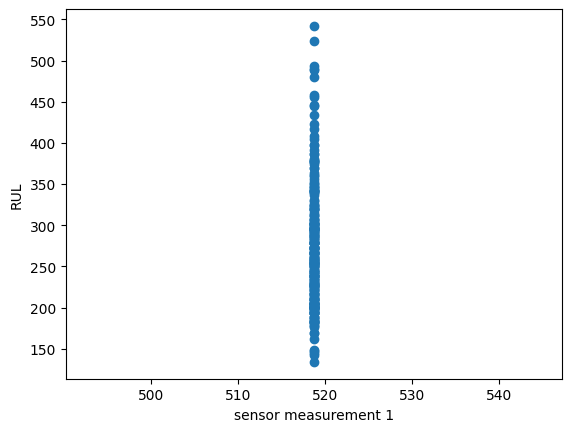

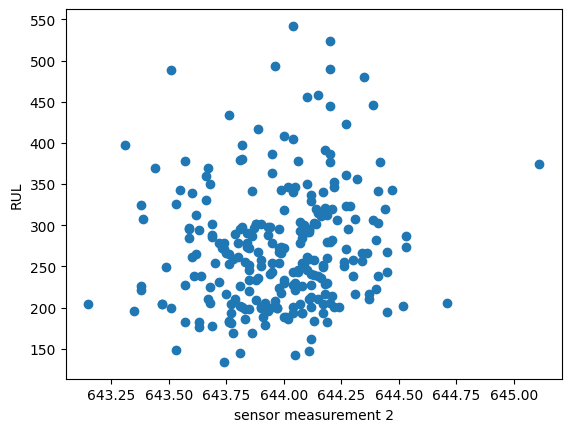

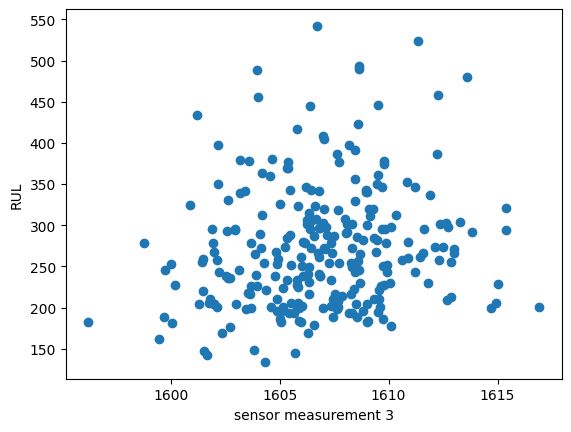

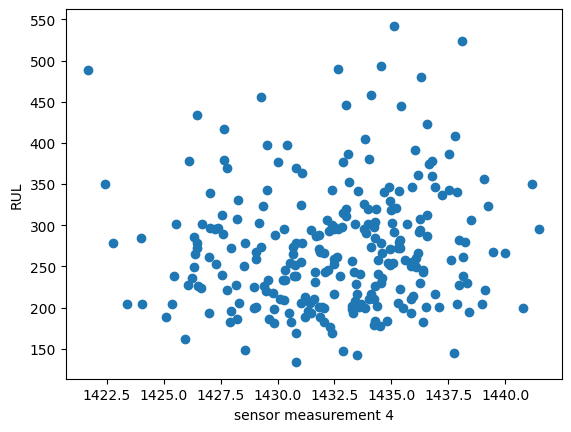

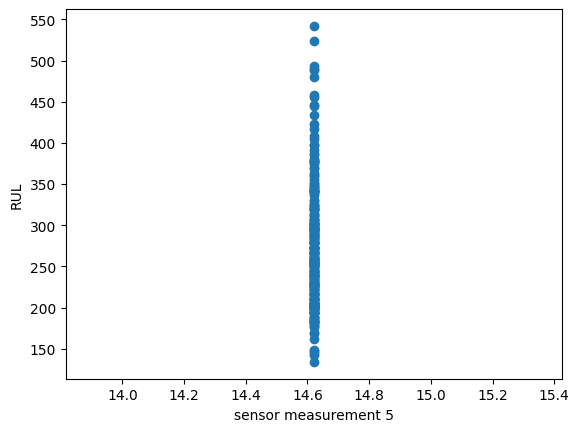

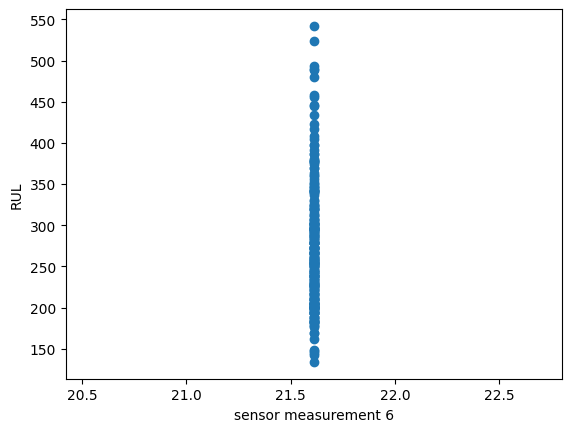

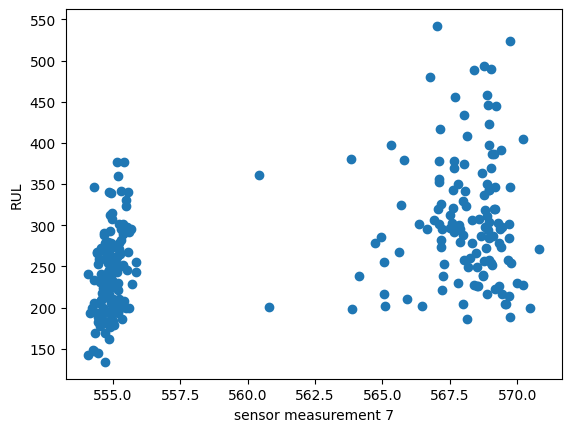

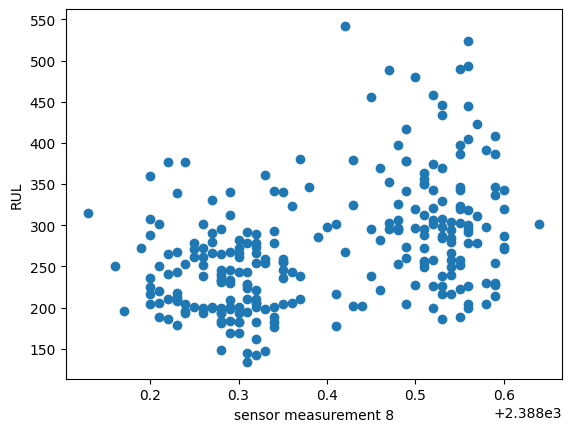

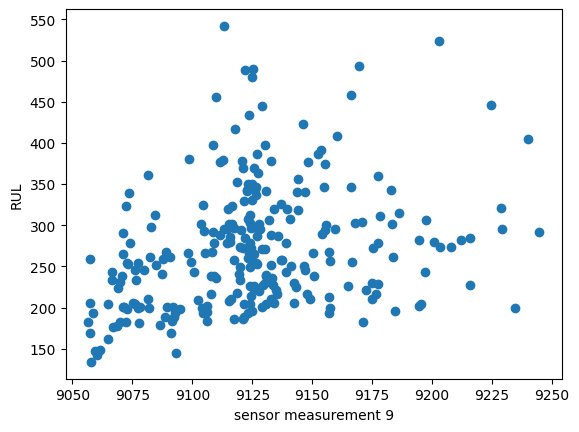

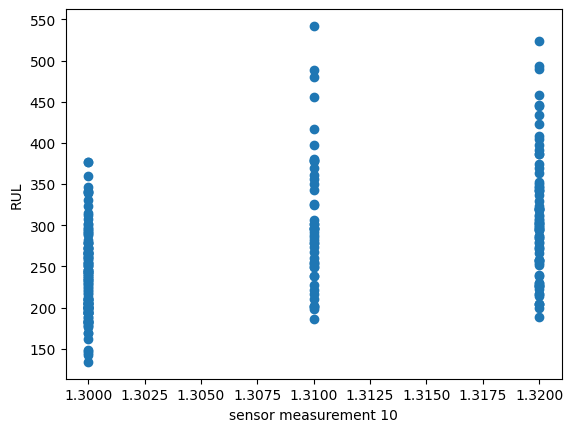

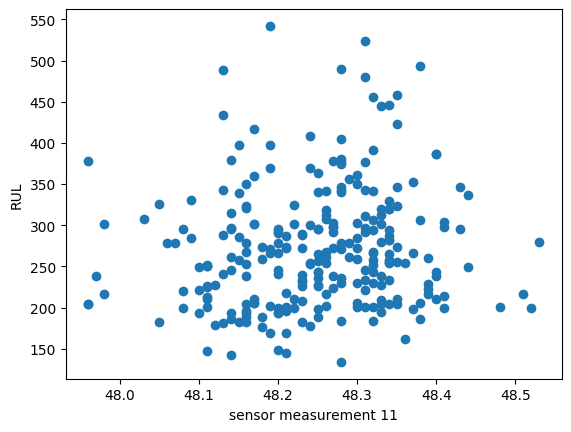

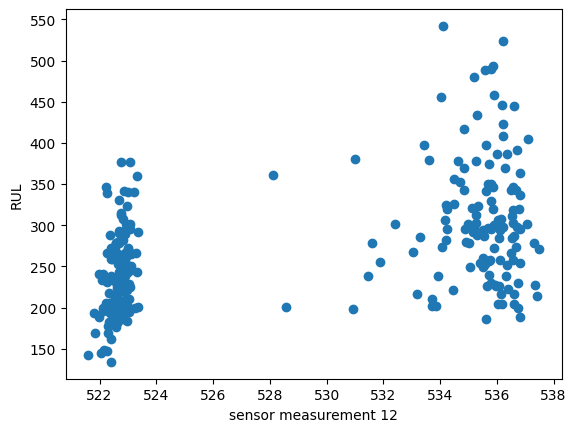

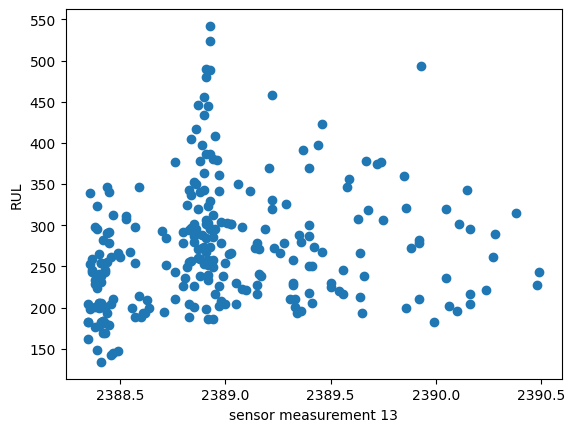

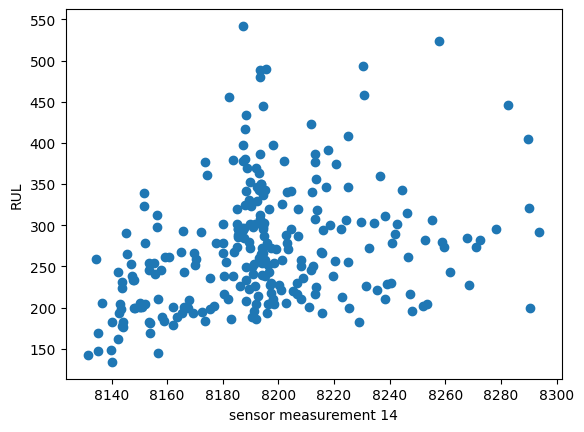

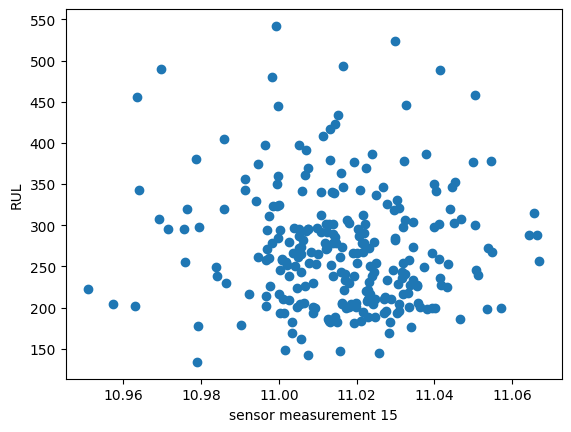

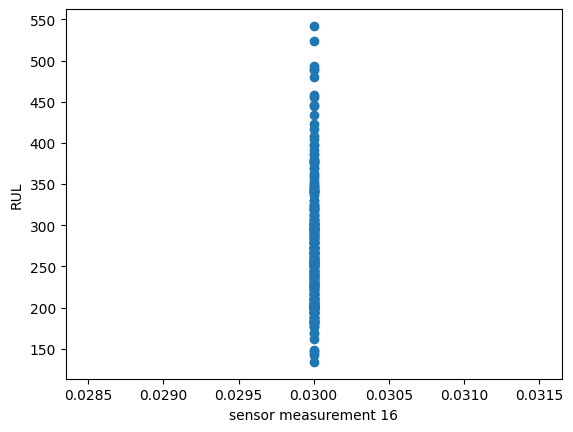

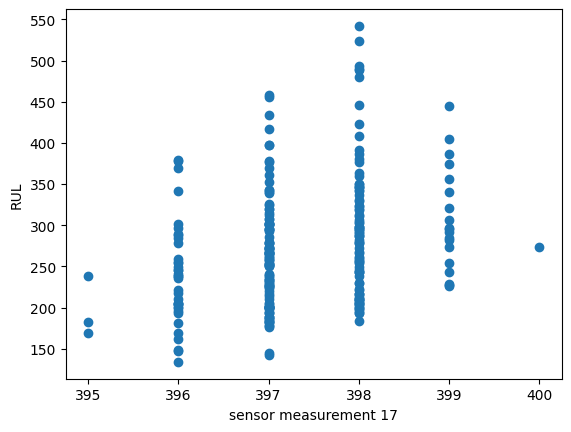

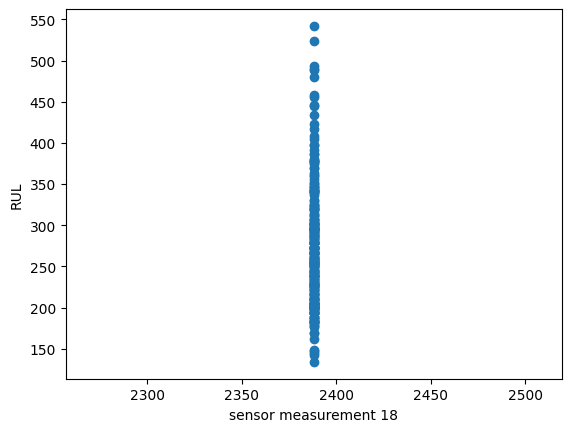

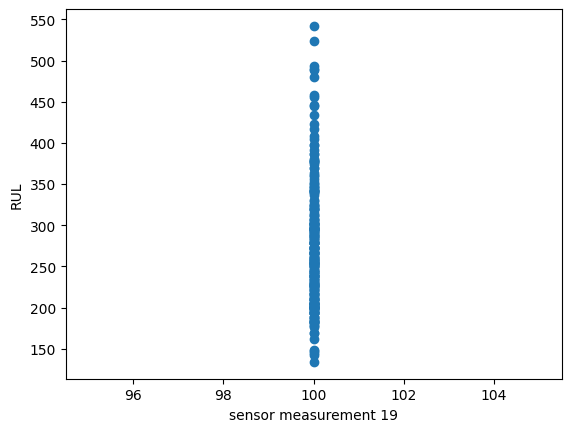

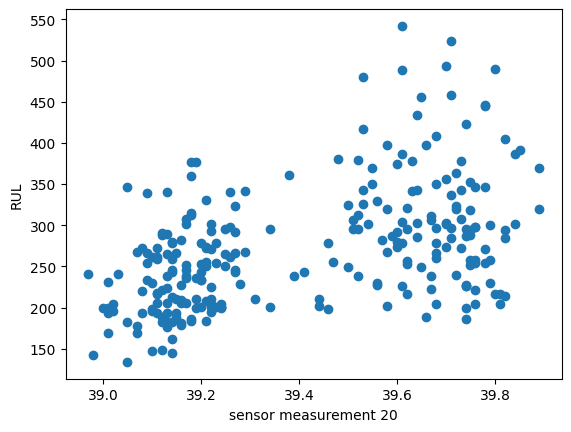

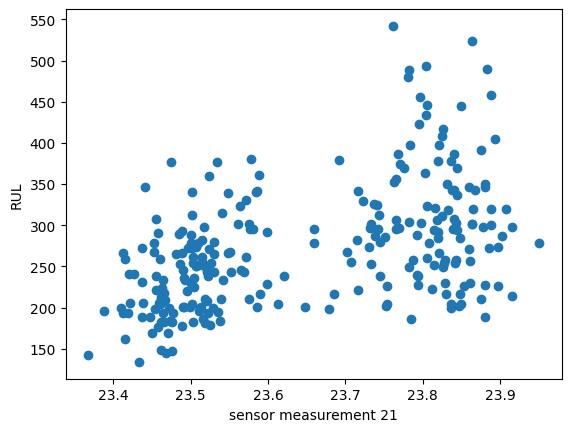

In [80]:
def plotting_all_sensors(dataset):
  i = 1
  column_name = "sensor measurement "
  while i <=21:
    temp_col = column_name + str(i)
    plt.figure()
    plt.scatter(dataset[temp_col],dataset['RUL'],label=temp_col)
    plt.xlabel(temp_col)
    plt.ylabel('RUL')
    plt.show()
    i = i+1

plotting_all_sensors(average_values)

<Axes: >

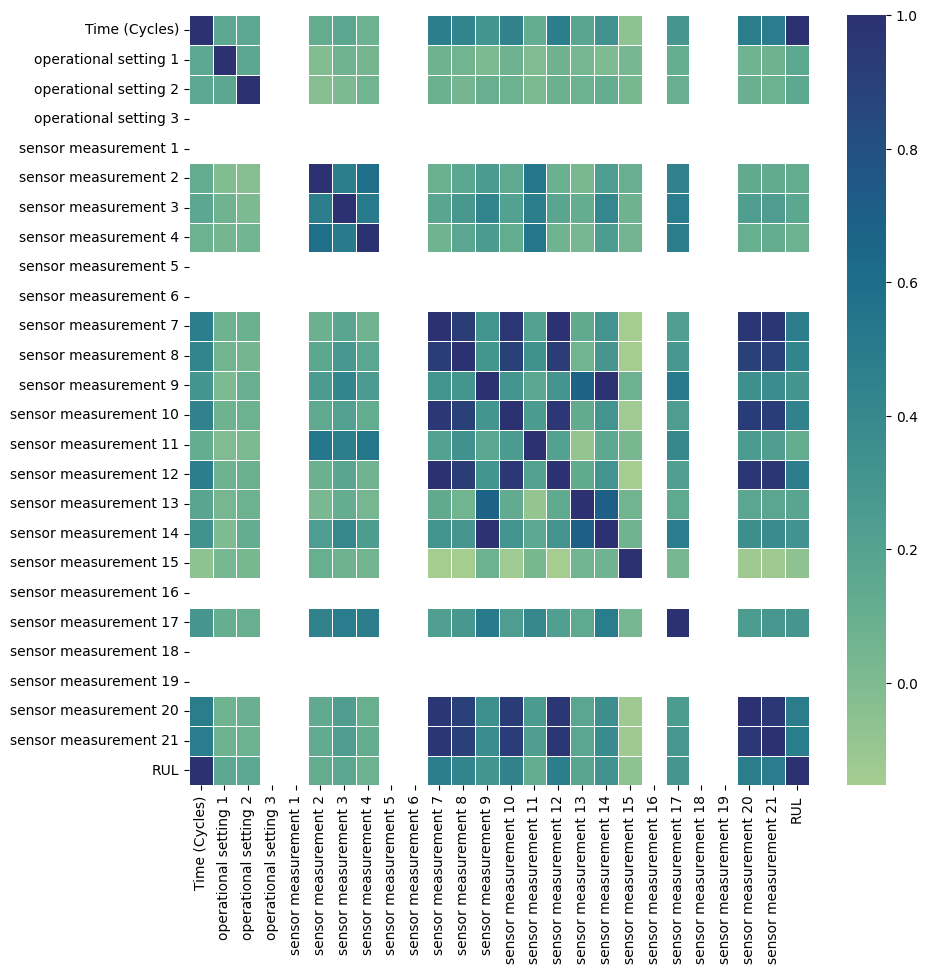

In [81]:
corr_matrix_training = average_values.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix_training, ax=ax, linewidth=.5,cmap="crest")

In [82]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

y_train = average_values['RUL']
names =  average_values.drop(columns=[average_values.columns[-1]])
average_values_std = StandardScaler().fit_transform(average_values)
pca = PCA(n_components=25)
average_values_train_scaled = pca.fit_transform(average_values_std)

In [83]:
x_train = pd.DataFrame(average_values_train_scaled, columns = names.columns)

In [84]:
x_train

,Time (Cycles),operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,sensor measurement 6,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,2.610196,-0.608755,-1.347682,0.441946,0.609971,1.677310,0.220668,-0.334799,-0.412557,0.142215,...,-0.452607,-0.035260,0.028122,-9.113771e-17,1.215942e-16,-1.927652e-16,-1.610615e-16,-1.552774e-17,-1.521704e-17,-1.372190e-17
1,2.912655,-0.607258,-1.098863,0.003856,-0.817680,-1.161936,0.350875,1.061224,-0.003202,-0.388887,...,-0.354611,-0.033948,-0.017533,3.898525e-16,7.380305e-16,-5.366576e-16,4.548560e-16,-8.054730e-17,1.266256e-16,-2.961177e-17
2,2.982724,2.269421,-0.102448,-0.103950,-0.022235,0.358414,0.436035,0.304513,-1.261461,0.864228,...,0.394416,-0.006039,0.010729,-1.239890e-16,4.414116e-16,3.749581e-17,1.948109e-16,4.134893e-16,-1.286095e-16,-5.259556e-17
3,0.080608,4.665610,0.449966,-0.643176,1.276766,-0.998304,-2.531536,0.342709,-0.411392,0.459442,...,0.094235,0.031133,0.023767,-1.153758e-15,1.638615e-15,1.426997e-15,8.941624e-16,-1.269551e-16,9.764059e-17,5.739676e-17
4,-0.868173,3.781561,-0.236869,-1.974970,2.836084,-1.925602,4.614312,-0.082021,-0.312784,-0.624002,...,0.044969,-0.186167,0.031250,-1.146421e-15,-1.252838e-15,1.268165e-15,-7.917254e-16,1.198158e-16,-8.126642e-17,-2.515295e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,-4.236216,-1.578318,-1.679542,-1.888367,1.867140,-0.037529,3.587701,-0.577056,-0.101842,1.205801,...,0.068187,-0.023734,0.032547,1.465446e-16,1.805561e-16,-7.552596e-17,1.259799e-16,5.110701e-17,-3.428188e-17,-1.081833e-17
256,-2.130204,-0.403107,3.365396,0.876606,0.610412,2.499605,-0.975525,0.713622,0.921401,-0.577285,...,0.112399,0.070822,-0.013701,-7.353258e-17,-1.114827e-17,2.606745e-17,-2.295895e-17,3.400055e-17,-1.517301e-17,-3.137096e-17
257,-4.446717,-0.721247,-1.440181,-0.212252,-0.771745,0.800542,0.353666,-0.391067,-1.351953,-0.534802,...,0.227710,-0.130875,0.040462,6.013977e-17,1.270117e-17,6.086660e-17,4.960850e-17,5.966163e-17,-4.467571e-17,5.917728e-17
258,-4.839906,-3.508499,1.547199,0.558926,-1.318110,-0.573698,-0.410112,1.452213,0.132479,-0.429455,...,-0.156221,0.043604,0.002658,-4.655182e-17,-2.961018e-17,1.719872e-16,-3.523544e-17,3.583579e-17,2.047013e-17,8.217171e-17


In [85]:
model = Sequential([
    Dense(160, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(480, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(256, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])

In [86]:
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle,
    optimizer=Adam(learning_rate=0.01),
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train.values,
    y_train.values,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
4/4 [==============================] - 3s 90ms/step - loss: 18.6433 - mean_squared_logarithmic_error: 16.0571 - val_loss: 1.6669 - val_mean_squared_logarithmic_error: 1.6669
Epoch 2/10
4/4 [==============================] - 0s 19ms/step - loss: 0.7607 - mean_squared_logarithmic_error: 0.6380 - val_loss: 0.4071 - val_mean_squared_logarithmic_error: 0.4071
Epoch 3/10
4/4 [==============================] - 0s 17ms/step - loss: 0.6617 - mean_squared_logarithmic_error: 0.7785 - val_loss: 1.5502 - val_mean_squared_logarithmic_error: 1.5502
Epoch 4/10
4/4 [==============================] - 0s 16ms/step - loss: 1.6120 - mean_squared_logarithmic_error: 1.6500 - val_loss: 1.8497 - val_mean_squared_logarithmic_error: 1.8497
Epoch 5/10
4/4 [==============================] - 0s 16ms/step - loss: 1.7265 - mean_squared_logarithmic_error: 1.7092 - val_loss: 1.4142 - val_mean_squared_logarithmic_error: 1.4142
Epoch 6/10
4/4 [==============================] - 0s 17ms/step - loss: 1.1938 - mea

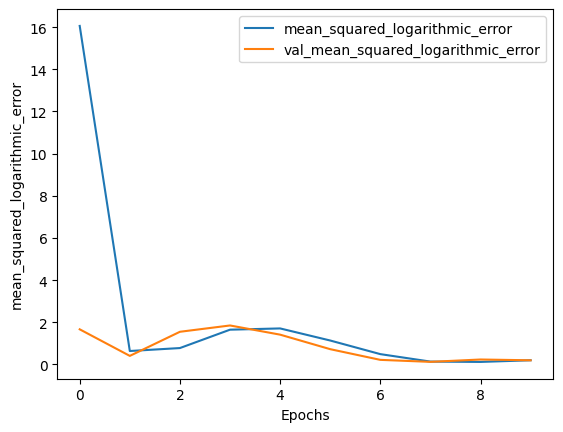

In [87]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')